# Linear Discriminant Analysis (LDA)
---

A LDA model on the $2^{nd}$ and $4^{th}$ principal components of the dog and cat wavelet image data

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from scipy import io
import os
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

# Load data

In [192]:
# Load wavelet image data of dog and cat
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

# Combine 2 data sets into 1
CD = np.concatenate((dog_wave,cat_wave),axis=1)
CD, CD.shape

(array([[ 2,  4,  8, ...,  3,  6,  6],
        [ 7,  5, 10, ...,  7,  5,  5],
        [ 7, 36, 34, ...,  9, 25,  4],
        ...,
        [20, 15, 10, ..., 12,  3, 10],
        [39,  6, 10, ..., 28,  3, 14],
        [ 6, 10, 13, ..., 31,  3, 15]], dtype=uint8),
 (1024, 160))

In [193]:
# Singular Value Decomposition
# Subtraction with mean to normalize the data set
u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

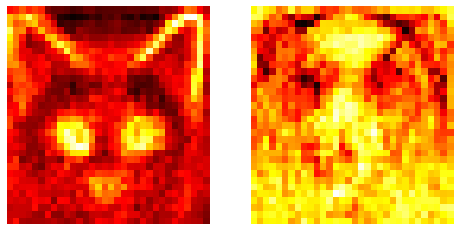

In [194]:
# Plot 2 random images
plt.rcParams['figure.figsize'] = [8,4]
fig,axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

# Prepare the training and test set

The model will be trained on the 60 images of dogs and cats,
and then tests the classifier on the remaining 20 dog and cat images

In [195]:
# get the 2nd and 4th PCs
X = v[:,(1,3)]
y = np.repeat(np.array([1,-1]),80)
# dog label is 1 and cat label is -1
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

In [196]:
# Split them into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25,stratify=y, random_state=434)
X_train.shape, X_test.shape
y_test

array([ 1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1,  1, -1,  1, -1, -1])

# Train model
### [LDA Algorithm](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
### [LDA Built-in function](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html?highlight=lineardiscriminantanalysis#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
- A classifier with a linear decision boundary,
generated by fitting class conditional densities to the data and using Bayes’ rule.
- The model fits a Gaussian density to each class,
assuming that all classes share the same covariance matrix.
- The fitted model can also be used to reduce the dimensionality of the input
by projecting it to the most discriminative directions, using the $transform$ method.

Solver to use, possible values:
- `svd`: Singular value decomposition (default).
Does not compute the covariance matrix,
therefore this solver is recommended for data with a large number of features.
- `lsqr`: Least squares solution
- `eigen`: Eigenvalue decomposition

(0.85, 0.9)

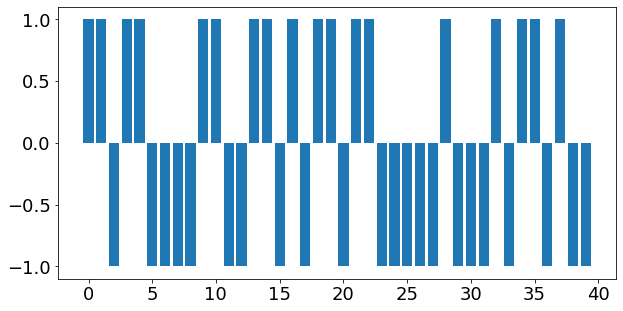

In [197]:
lda = LinearDiscriminantAnalysis(solver='eigen')
lda.fit(X_train, y_train)
y_hat = lda.predict(X_test)
plt.figure(figsize=(10,5))
plt.bar(range(40),y_hat)
lda.score(X_train,y_train),lda.score(X_test,y_test)

<ipython-input-198-2f4e248ff7a5>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(x,-(L[0]*x+K)/L[1],'k',LineWidth=2)
<ipython-input-198-2f4e248ff7a5>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0].plot(x,-(L[0]*x+K)/L[1],'k',LineWidth=2)


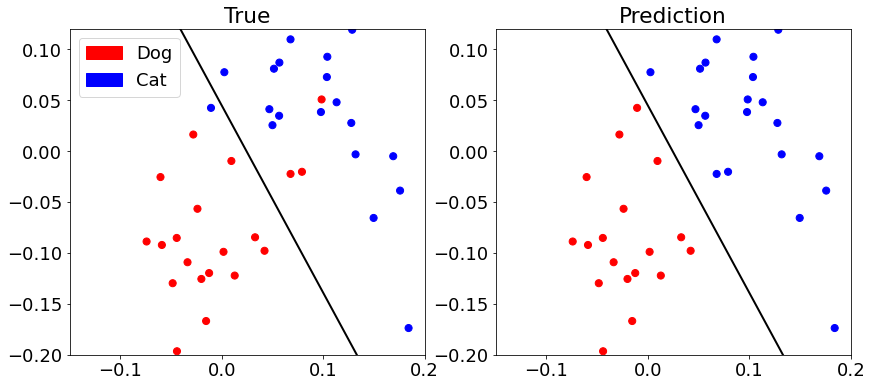

In [198]:
# Compare via scatter plots
fig,axs = plt.subplots(1,2,figsize=(14,6))
true_c = np.where(y_test==1,'red','blue')
pred_c = np.where(y_hat==1,'red','blue')
axs[0].scatter(X_test[:,0],X_test[:,1],c=true_c,s=50)
axs[0].set_title('True')
red_patch = mpatches.Patch(color='red', label='Dog')
blue_patch = mpatches.Patch(color='blue', label='Cat')
axs[0].legend(handles=[red_patch, blue_patch])
axs[0].set_ylim(-0.2,0.12)
axs[0].set_xlim(-0.15,0.2)
axs[1].scatter(X_test[:,0],X_test[:,1],c=pred_c,s=50)
axs[1].set_title('Prediction')
K = -lda.intercept_[0]
L = -lda.coef_[0]
x = np.arange(-0.15,0.25,0.005)
axs[1].plot(x,-(L[0]*x+K)/L[1],'k',LineWidth=2)
axs[0].plot(x,-(L[0]*x+K)/L[1],'k',LineWidth=2)
axs[1].set_ylim(-0.2,0.12)
axs[1].set_xlim(-0.15,0.2)
plt.show()

# Cross-validation

Runs 100 trials of the classify command where
60 dog and cat images are randomly selected and tested against the remaining 20 images

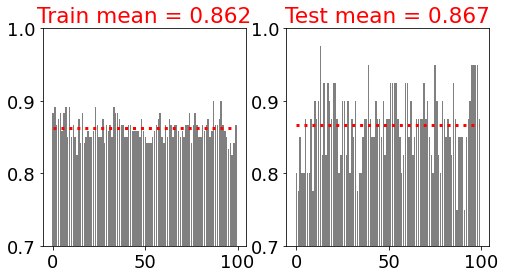

In [199]:
train_scores = []
test_scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25,stratify=y)
    lda = LinearDiscriminantAnalysis(solver='eigen')
    lda.fit(X_train, y_train)
    train_scores.append(lda.score(X_train,y_train))
    test_scores.append(lda.score(X_test,y_test))

plt.subplot(1,2,1)
plt.bar(range(100),train_scores,color=(0.5,0.5,0.5))
mean_score = np.mean(train_scores)
plt.plot(range(100),np.mean(train_scores)*np.ones(100),'r:',linewidth=3)
plt.ylim(0.7,1)
plt.title('Train mean = {:.3f}'.format(mean_score), color='red')
plt.subplot(1,2,2)
plt.bar(range(100),test_scores,color=(0.5,0.5,0.5))
mean_score = np.mean(test_scores)
plt.plot(range(100),np.mean(test_scores)*np.ones(100),'r:',linewidth=3)
plt.title('Test mean = {:.3f}'.format(mean_score), color='red')
plt.ylim(0.7,1)
plt.show()

# Linear Discriminant Analysis vs Quadratic Discriminant Analysis

In [200]:
lda = LinearDiscriminantAnalysis('eigen').fit(X_train, y_train)
y_pred = lda.predict(X_test)
K = -lda.intercept_[0]
L = -lda.coef_[0]
print(K,L)
x1 = np.arange(-0.15,0.25,0.005)
LDLine = -(L[0]*x+K)/L[1]
lda.score(X_train,y_train),lda.score(X_test,y_test)

-0.9905876930899686 [36.0377122 19.0868271]


C:\Users\duong\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass solver=eigen as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


(0.8666666666666667, 0.875)

In [201]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y1 = np.arange(-0.3,0.25,0.005)
X1,Y1 = np.meshgrid(x1,y1)

Z = np.zeros_like(X1)

for jj in range(len(x1)):
    for kk in range(len(y1)):
        Z[kk,jj] = qda.predict(np.array([[x1[jj],y1[kk]]]))

qda.score(X_train,y_train),qda.score(X_test,y_test)

(0.8583333333333333, 0.85)

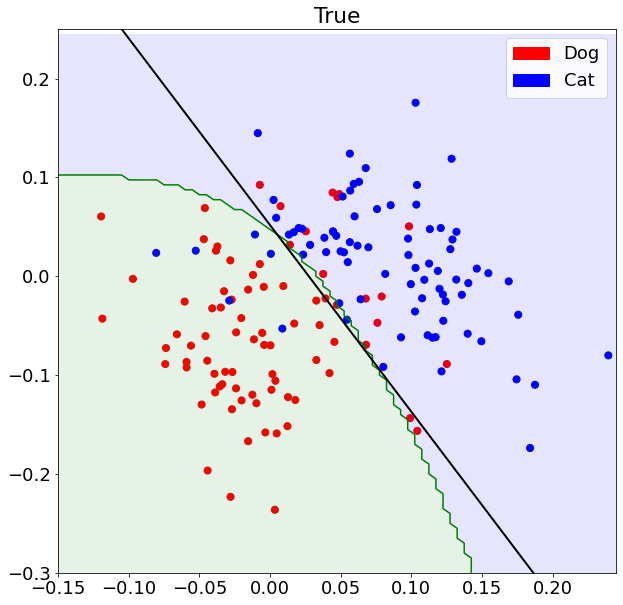

In [203]:
plt.figure(figsize=(10,10))
true_c = np.where(y==1,'red','blue')
plt.scatter(X[:,0],X[:,1],c=true_c,s=50)
plt.plot(x1,LDLine,'k',linewidth=2,label='LDA')
plt.contourf( X1, Y1, Z, 0, alpha = .1, colors = ('blue','green'))
plt.contour( X1, Y1, Z, 0, alpha = 1, colors = ('blue','green'))
plt.title('True')
red_patch = mpatches.Patch(color='red', label='Dog')
blue_patch = mpatches.Patch(color='blue', label='Cat')
plt.legend(handles=[red_patch, blue_patch])
plt.ylim(-0.3,0.25)
plt.show()

# Bonus: LDA vs QDA
https://thatdatatho.com/linear-vs-quadratic-discriminant-analysis/